In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pandas as pd
import os
import re
from datetime import datetime

In [2]:
# Our code
import traces_analysis
import load_traces
import parser_to_batsim
import parser_from_batsim_results

In [3]:
labelsize = 40
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize) 
plt.rc('axes', labelsize=labelsize) 
plt.rc('figure', titlesize=labelsize)

In [4]:
from importlib import reload
reload(traces_analysis)
reload(load_traces)
reload(parser_to_batsim)
reload(parser_from_batsim_results)

<module 'parser_from_batsim_results' from '/home/robin/Documents/git divers/hpc_metrics_code/parser_from_batsim_results.py'>

# Mira results

In [5]:
# load traces
jl, nl = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Mira with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
x, name_list =  extract_name_and_param(nl)
#compute metrics
loss_list = parser_from_batsim_results.make_loss_list(jl)

Text(0, 0.5, 'Workload in queue\n(10^10 cores-seconds)')

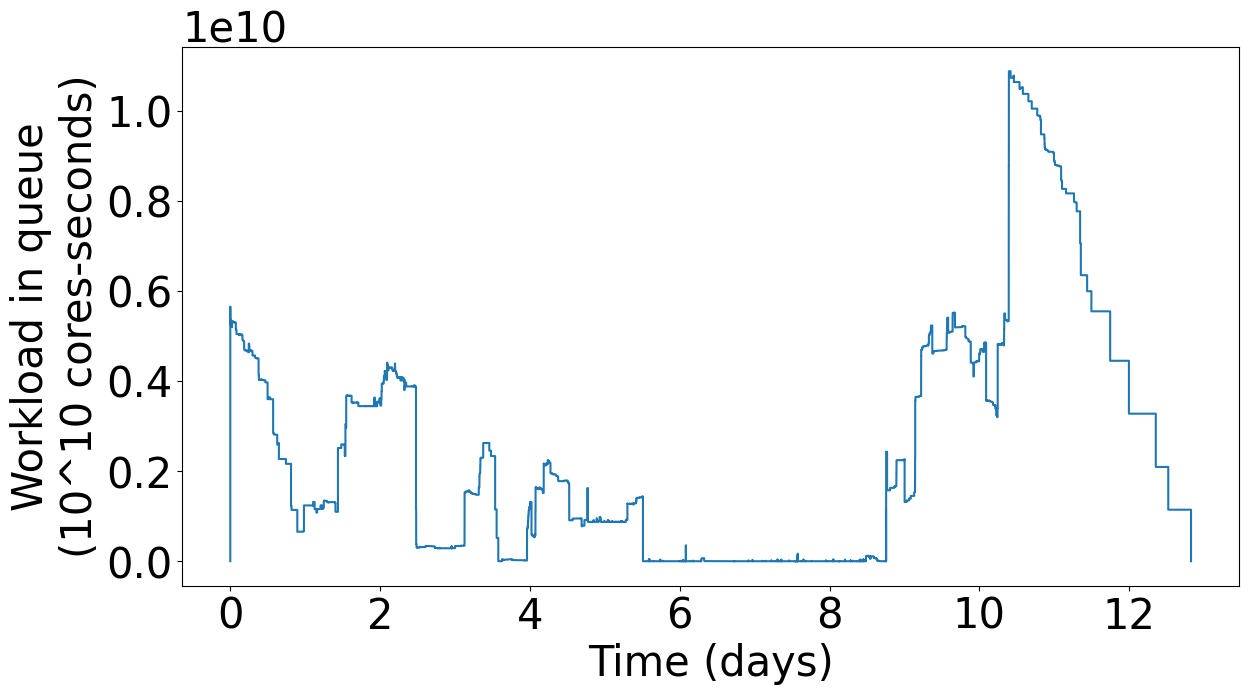

In [6]:
# plot_workload in queue
ind = 4 # indice of the sample of mira traces that is going to be plotted (between 1 and 20)

jlm = load_traces.put_batsim_output_in_Mira_format(jl)
plt.figure(figsize = (30,7))
# traces_analysis.mult_plot_queue_workload(jlm[ind:ind+len(name_list)//2+1:len(name_list)//2], title = ['Inexact', 'Exact'], titlesize = 25)
traces_analysis.mult_plot_queue_workload([jlm[ind]], title = ['', ''], titlesize = 25)
plt.xlabel('Time (days)')
plt.ylabel('Workload in queue\n(10^10 cores-seconds)')

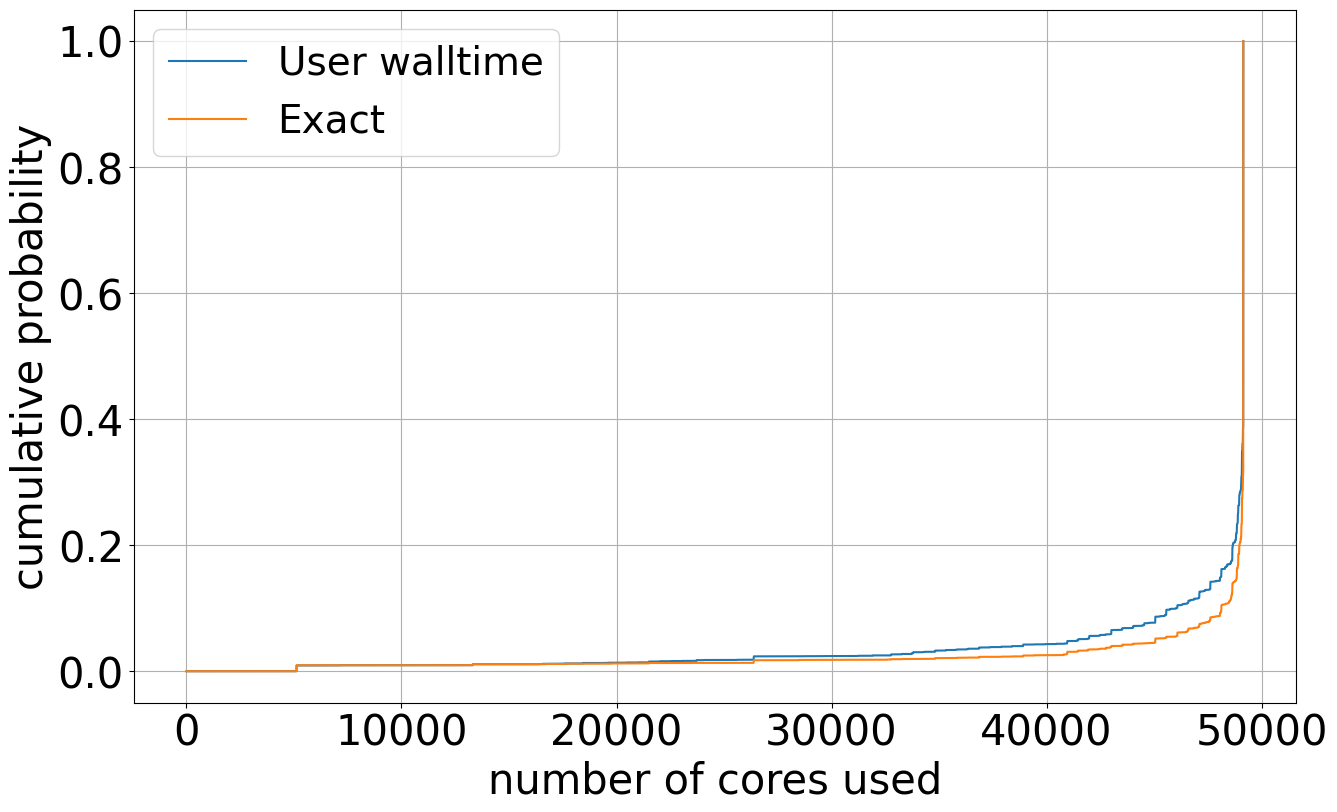

In [7]:
plt.figure(figsize = (15,9))
ind = 17   # index of the sample
plt.grid()
parser_from_batsim_results.plot_cumulative_utilization([jl[ind], jl[30+ind]], label_list=['User walltime', 'Exact'])

# Analysis per group (Mira)

In [138]:
# load traces
jl, nl = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Mira with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
x, name_list =  extract_name_and_param(nl)
#compute metrics
criterion_list = ['execution time','nb res', 'area', 'rt/wt']
bins = ['geom', 'geom', 'geom', 'lin']
mid = len(name_list)//2
jl1 = jl[:mid]
jl2 = jl[mid:]
loss_per_group_list_list = []
for criterion, bin in zip(criterion_list, bins):
    loss_per_group_list_list.append(parser_from_batsim_results.make_pair_loss(jl1, jl2, criterion, bin, n=18))

/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:426: RuntimeWarning: Mean of empty slice.
  return time.mean()
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:433: RuntimeWarning: invalid value encountered in double_scalars
  return (time*rn).sum()/rn.sum()
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:441: RuntimeWarning: Mean of empty slice.
  return sd.mean()
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:447: RuntimeWarning: invalid value encountered in double_scalars
  return (sd*weights).sum()/weights.sum()


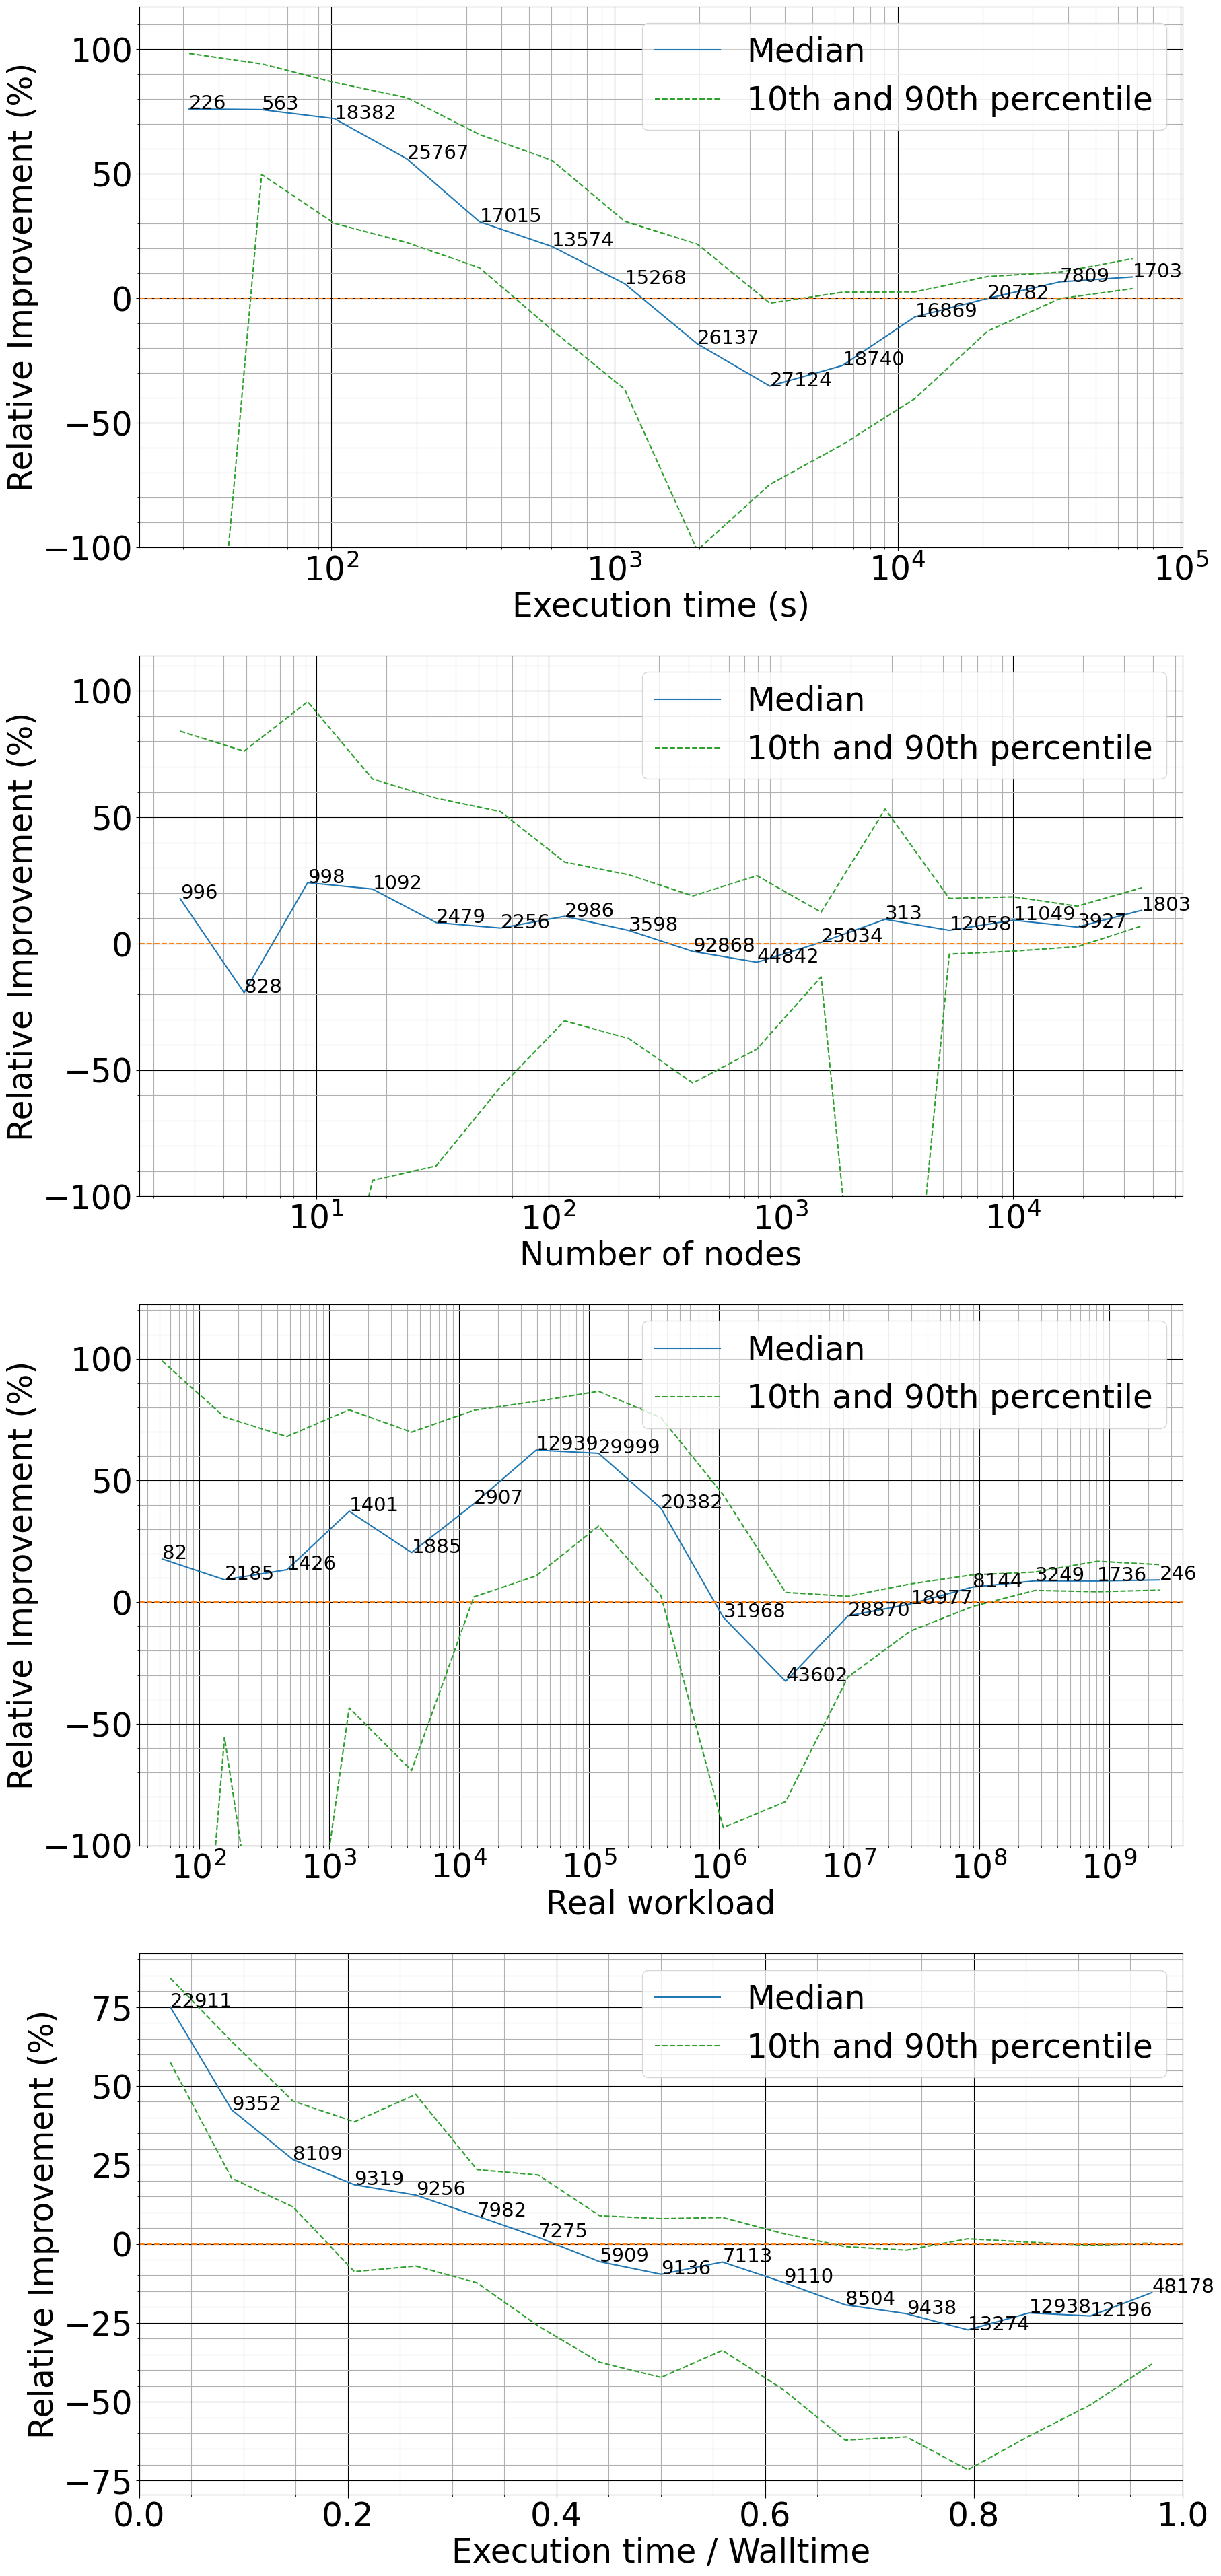

In [147]:
keyword = 'raw response time'
serie_list = ['adjusted_walltime', 'runtime']
scales = ['log']*3 + ['lin']
xlabel_list = ['Execution time (s)', 'Number of nodes', 'Real workload','Execution time / Walltime']#None
number_of_colums = 1
title_size = labelsize
label_size = labelsize
fontsize = 21
title_keyword = 'response time'
plt.figure(figsize = (20, 12 * int(np.ceil(len(criterion_list)/number_of_colums)) / number_of_colums))
parser_from_batsim_results.plot_behaviour_per_group(name_list, loss_per_group_list_list, criterion_list, scales = scales, keyword = keyword, xlabel_list = xlabel_list, serie_list = serie_list, number_of_colums = number_of_colums, title_size = title_size, label_size = label_size, fontsize = fontsize, title_keyword = title_keyword, show_title = False)

# Analysis per group (Theta)

In [148]:
# load traces
jl, nl = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Theta with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
x, name_list =  extract_name_and_param(nl)
#compute metrics
criterion_list = ['execution time','nb res', 'area', 'rt/wt']
bins = ['geom', 'geom', 'geom', 'lin']
mid = len(name_list)//2
jl1 = jl[:mid]
jl2 = jl[mid:]
loss_per_group_list_list = []
for criterion, bin in zip(criterion_list, bins):
    loss_per_group_list_list.append(parser_from_batsim_results.make_pair_loss(jl1, jl2, criterion, bin, n=18))

/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:426: RuntimeWarning: Mean of empty slice.
  return time.mean()
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:433: RuntimeWarning: invalid value encountered in double_scalars
  return (time*rn).sum()/rn.sum()
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:441: RuntimeWarning: Mean of empty slice.
  return sd.mean()
/home/boezennec/Documents/code these/common-repository/code/runtime_estimates_script/parser_from_batsim_results.py:447: RuntimeWarning: invalid value encountered in double_scalars
  return (sd*weights).sum()/weights.sum()


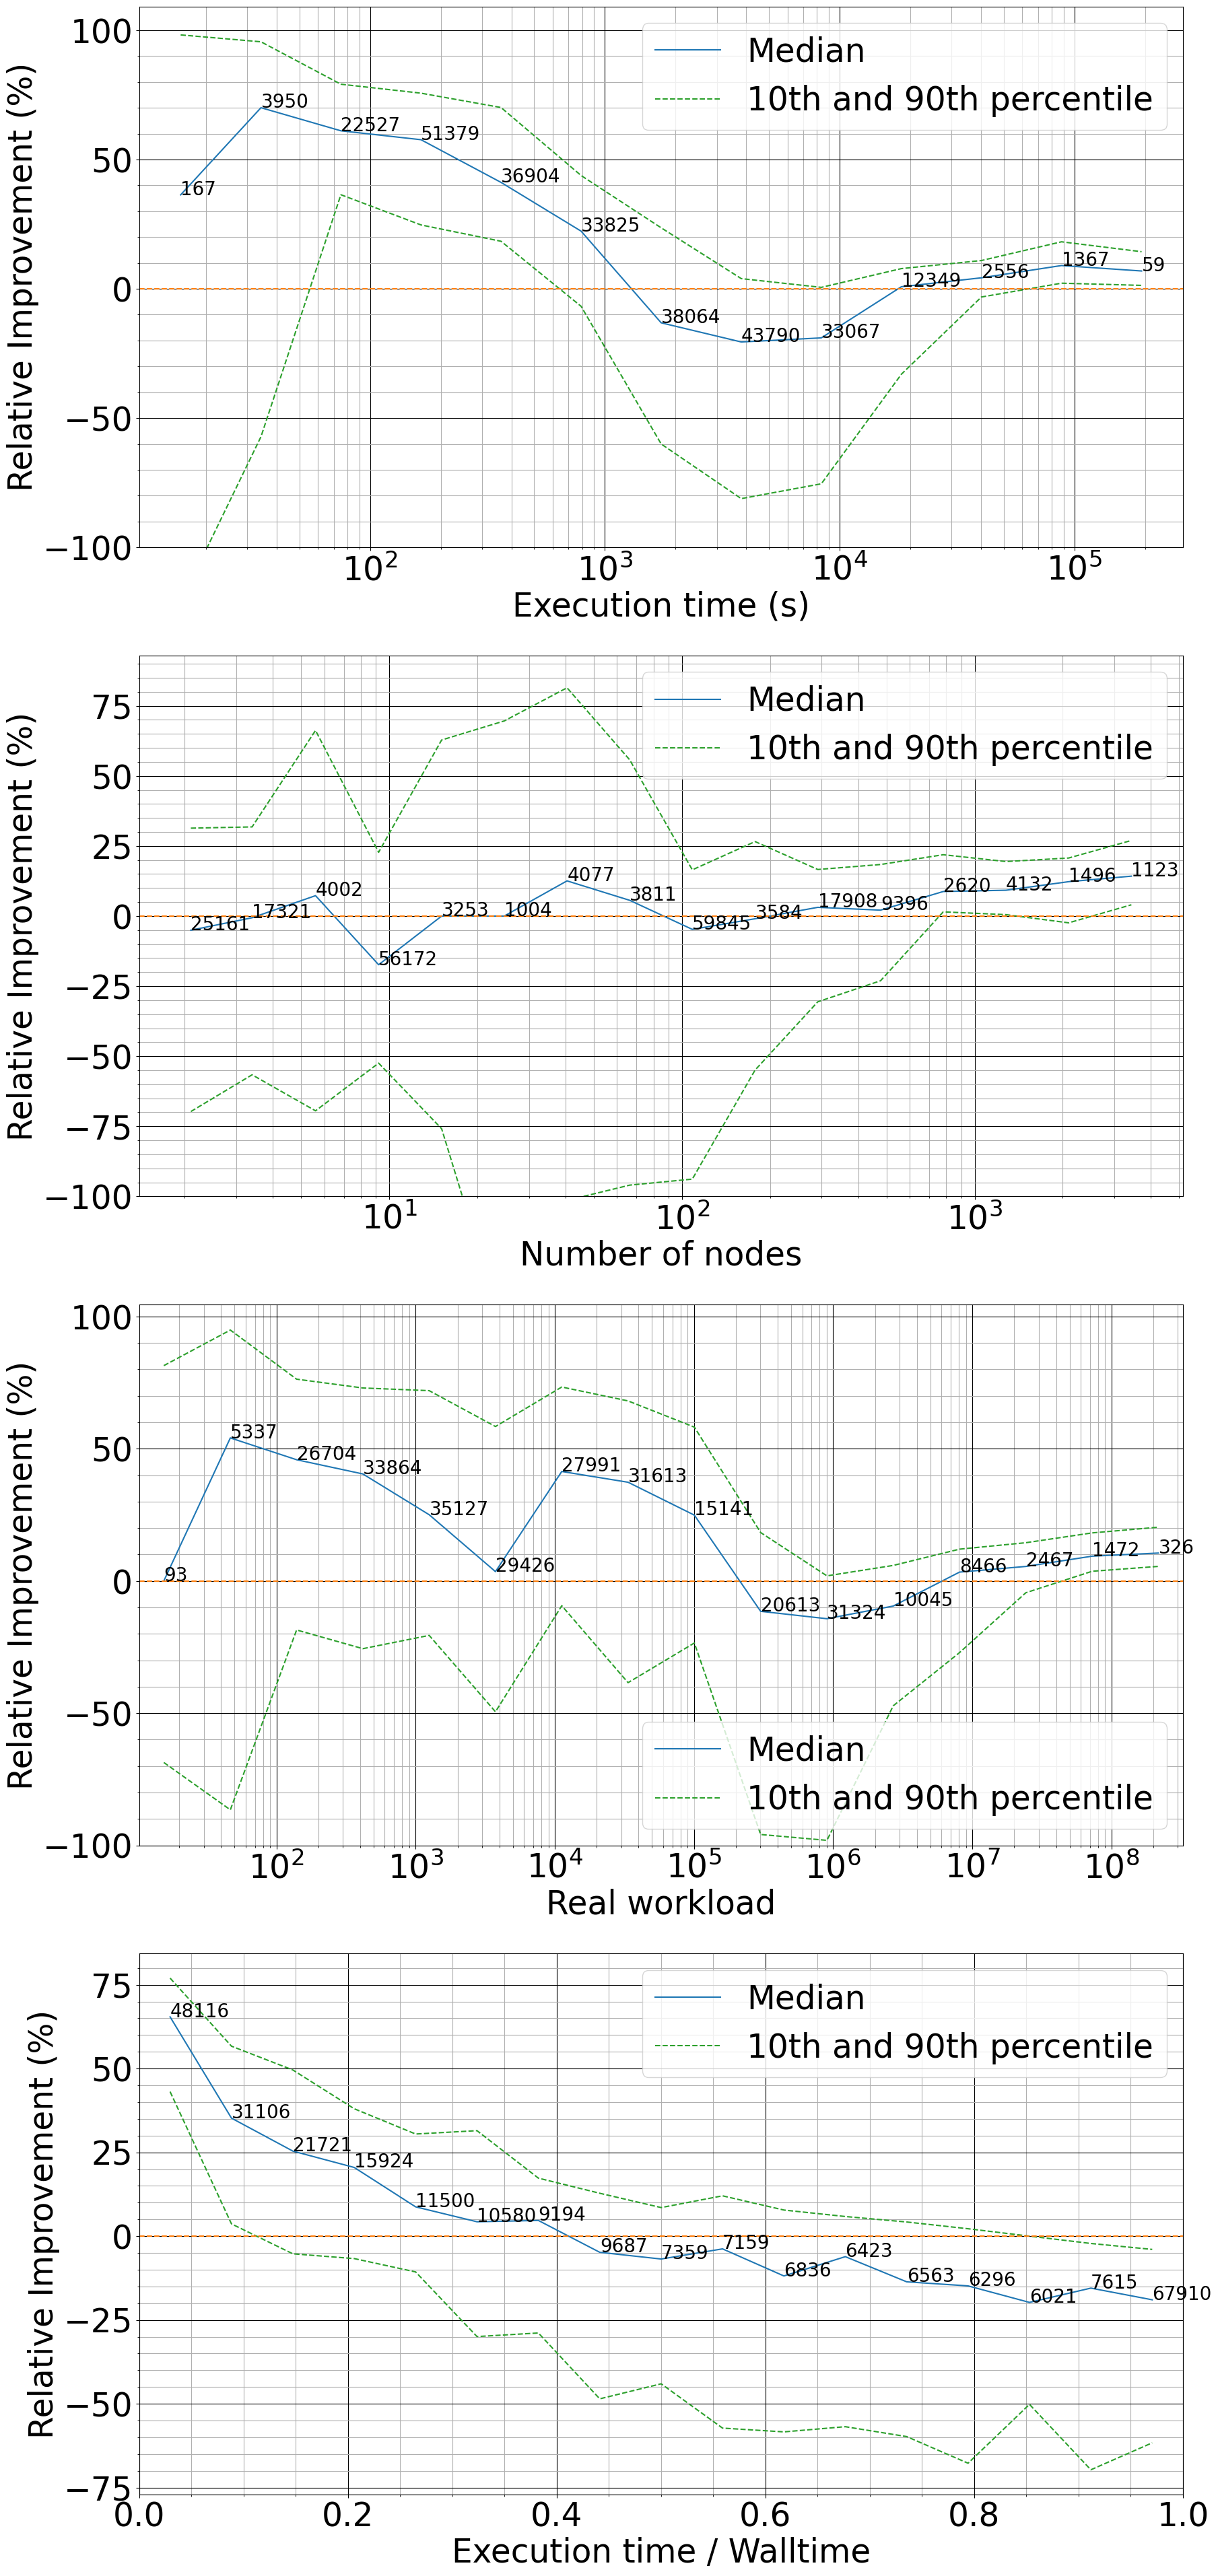

In [149]:
keyword = 'raw response time'
serie_list = ['adjusted_walltime', 'runtime']
scales = ['log']*3 + ['lin']
xlabel_list = ['Execution time (s)', 'Number of nodes', 'Real workload','Execution time / Walltime']#None
number_of_colums = 1
title_size = labelsize
label_size = labelsize
fontsize = 20
title_keyword = 'response time'
plt.figure(figsize = (20, 12 * int(np.ceil(len(criterion_list)/number_of_colums)) / number_of_colums))
parser_from_batsim_results.plot_behaviour_per_group(name_list, loss_per_group_list_list, criterion_list, scales = scales, keyword = keyword, xlabel_list = xlabel_list, serie_list = serie_list, number_of_colums = number_of_colums, title_size = title_size, label_size = label_size, fontsize = fontsize, title_keyword = title_keyword, show_title = False)

# Mira & Theta results

In [8]:
# load traces (MIRA)
jlm, nlm = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Mira with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
xm, name_listm =  extract_name_and_param(nlm)
#compute metrics
loss_listm = parser_from_batsim_results.make_loss_list(jlm)

In [9]:
# load traces (THETA)
jlt, nlt = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Theta with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
xt, name_listt =  extract_name_and_param(nlt)
#compute metrics
loss_listt = parser_from_batsim_results.make_loss_list(jlt, total_number_of_nodes = 4392)

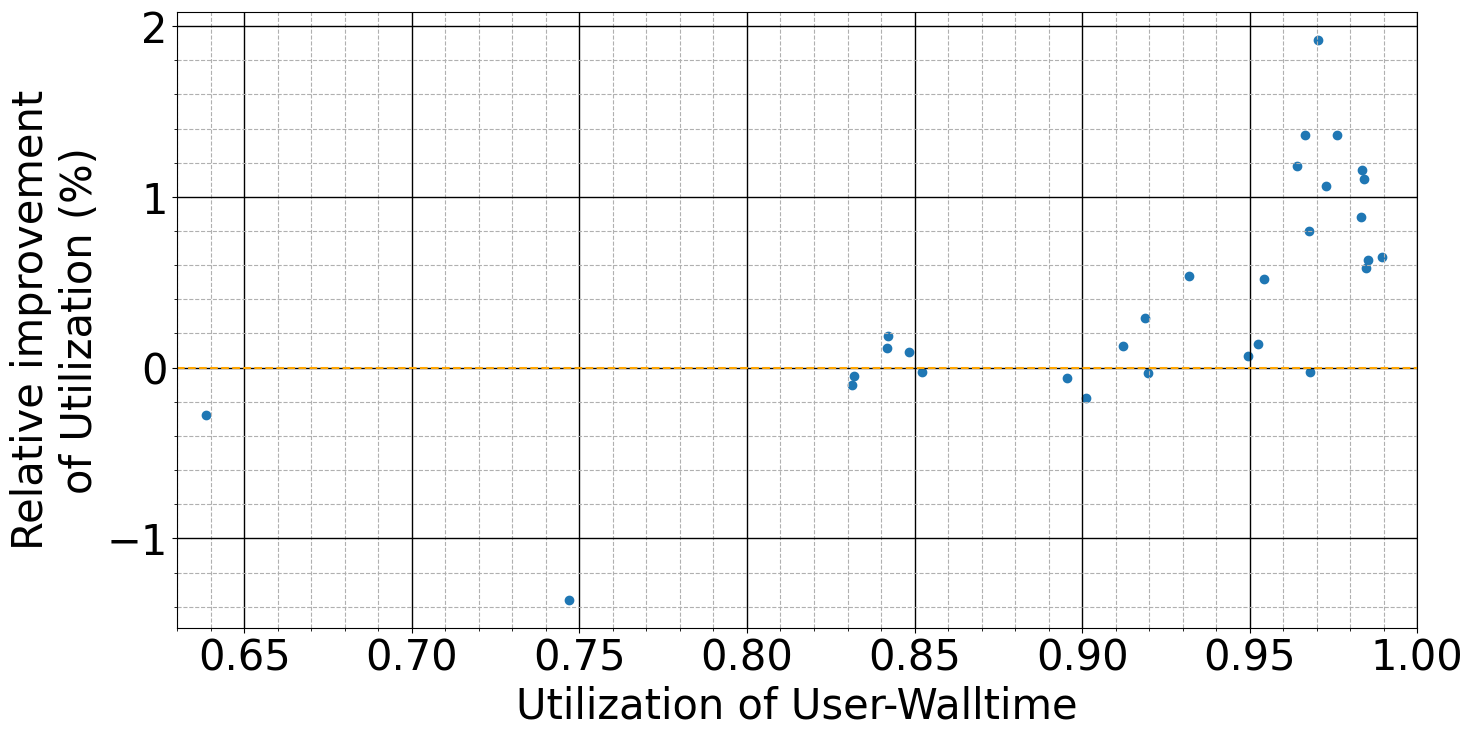

In [10]:
plt.figure(figsize = (16,8))

xxx = np.array(loss_listm['raw utilization'][:30])
yy_w = np.array(loss_listm['raw utilization'][:30])
yy_r = np.array(loss_listm['raw utilization'][30:])

plt.xlabel('Utilization of User-Walltime')
plt.ylabel('Relative improvement\nof Utilization (%)')
plt.xlim(0.63,1)
plt.minorticks_on()
plt.grid(linewidth = 1, which='major', axis = 'both', color = 'k')
plt.grid(linestyle = '--', which='minor', axis = 'both')
plt.minorticks_on()
plt.plot([0.63,1], [0,0], 'orange', ls = '--')
plt.scatter(xxx, (100*(yy_r-yy_w)/yy_w))
plt.show()

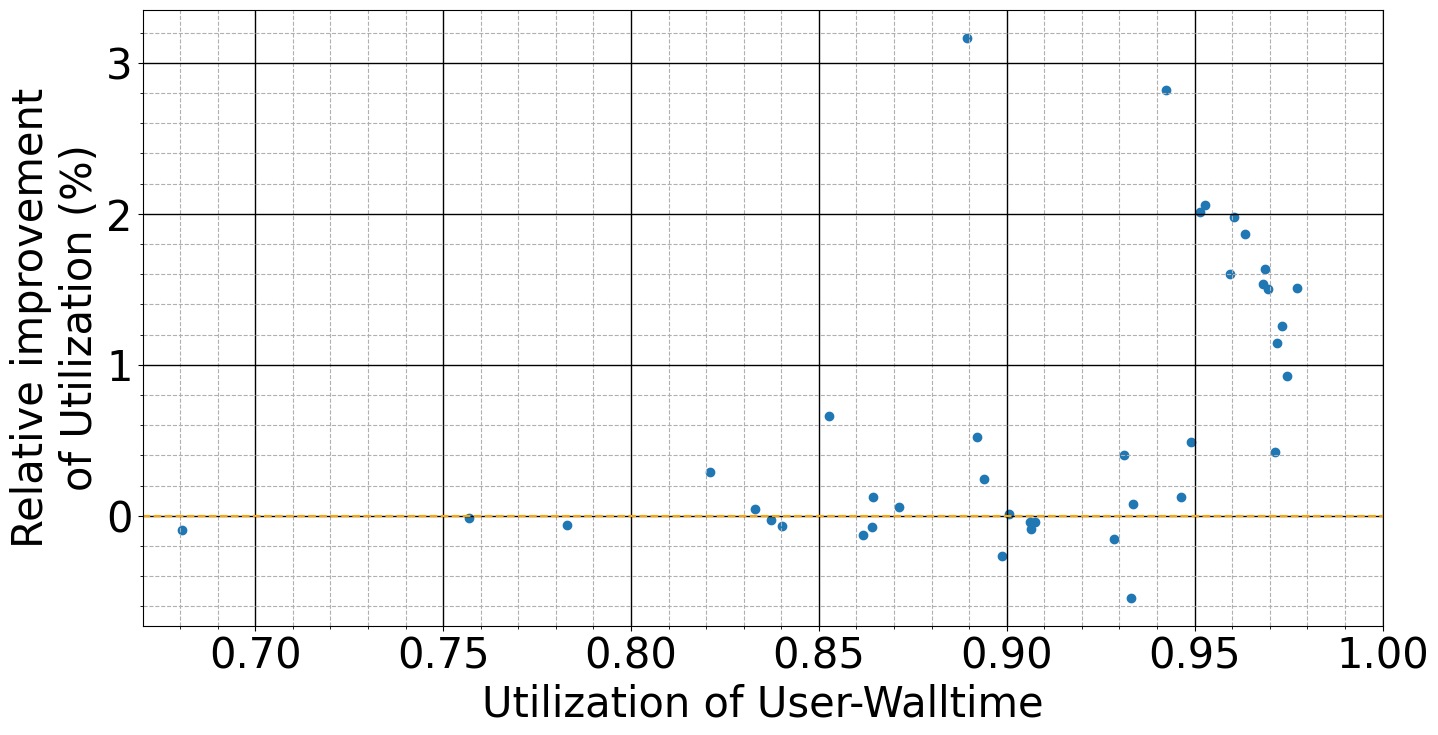

In [12]:
plt.figure(figsize = (16,8))
plt.minorticks_on()
plt.grid(linewidth = 1, which='major', axis = 'both', color = 'k')
plt.grid(linestyle = '--', which='minor', axis = 'both')

xxx = np.array(loss_listt['raw utilization'][:40])
yy_w = np.array(loss_listt['raw utilization'][:40])
yy_r = np.array(loss_listt['raw utilization'][40:])
plt.scatter(xxx, (100*(yy_r-yy_w)/yy_w))
plt.plot([0.63,1], [0,0], 'orange', ls = '--')
plt.xlabel('Utilization of User-Walltime')
plt.ylabel('Relative improvement\nof Utilization (%)')
plt.xlim(0.67,1)
plt.show()

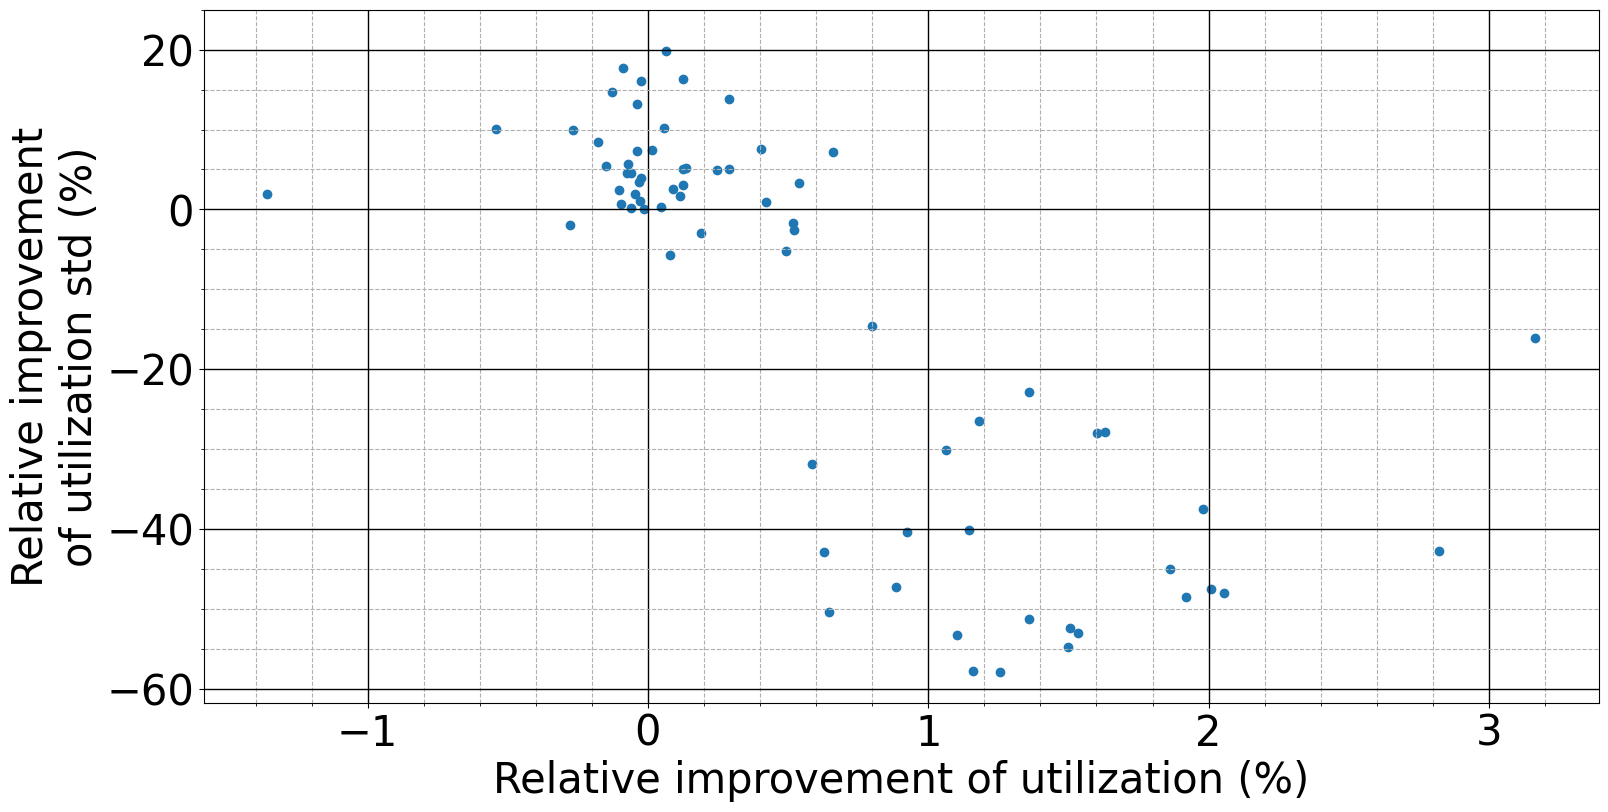

In [11]:
plt.figure(figsize = (18,9))
plt.minorticks_on()
plt.grid(linewidth = 1, which='major', axis = 'both', color = 'k')
plt.grid(linestyle = '--', which='minor', axis = 'both')
u_wm = np.array(loss_listm['raw utilization'][:30])
u_rm = np.array(loss_listm['raw utilization'][30:])
xxxm = 100*(u_rm - u_wm)/u_wm
u_wt = np.array(loss_listt['raw utilization'][:40])
u_rt = np.array(loss_listt['raw utilization'][40:])
xxxt = 100*(u_rt - u_wt)/u_wt
yy_w = np.concatenate((loss_listm['utilization_std'][:30],loss_listt['utilization_std'][:40]))
yy_r = np.concatenate((loss_listm['utilization_std'][30:],loss_listt['utilization_std'][40:]))
xxx = np.concatenate((xxxm,xxxt))
plt.scatter(xxx, (100*(yy_r-yy_w)/yy_w))
plt.xlabel('Relative improvement of utilization (%)')
plt.ylabel('Relative improvement\nof utilization std (%)')
plt.ylim(top = 25)
plt.show()

# Theta with short jobs deleted

In [12]:
# load traces
jl, nl = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Theta with Batsched short jobs deleted')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
x, name_list =  extract_name_and_param(nl)
#compute metrics
loss_list = parser_from_batsim_results.make_loss_list(jl)

Text(0, 0.5, 'Relative Improvement (%)')

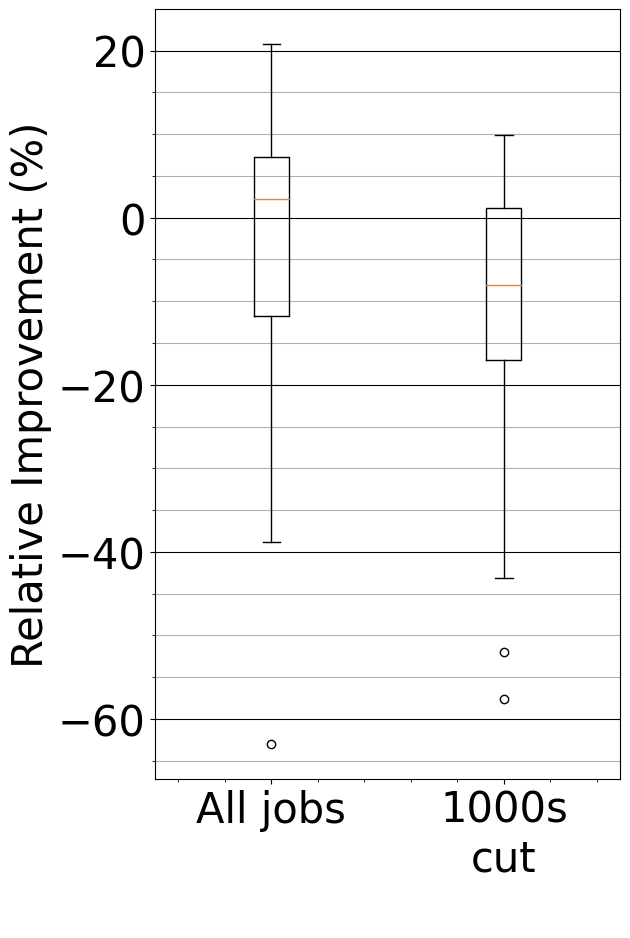

In [13]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
a = parser_from_batsim_results.loss_ratio_boxplot4(loss_list, name_list,
    prefixs = ['', '1e3cut_',],
    prefixs_label = ['All jobs', '1000s\ncut'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw response time'],
    keywords_label = ['','']
    )
plt.ylabel('Relative Improvement (%)')

(-50.0, 78.79095793247167)

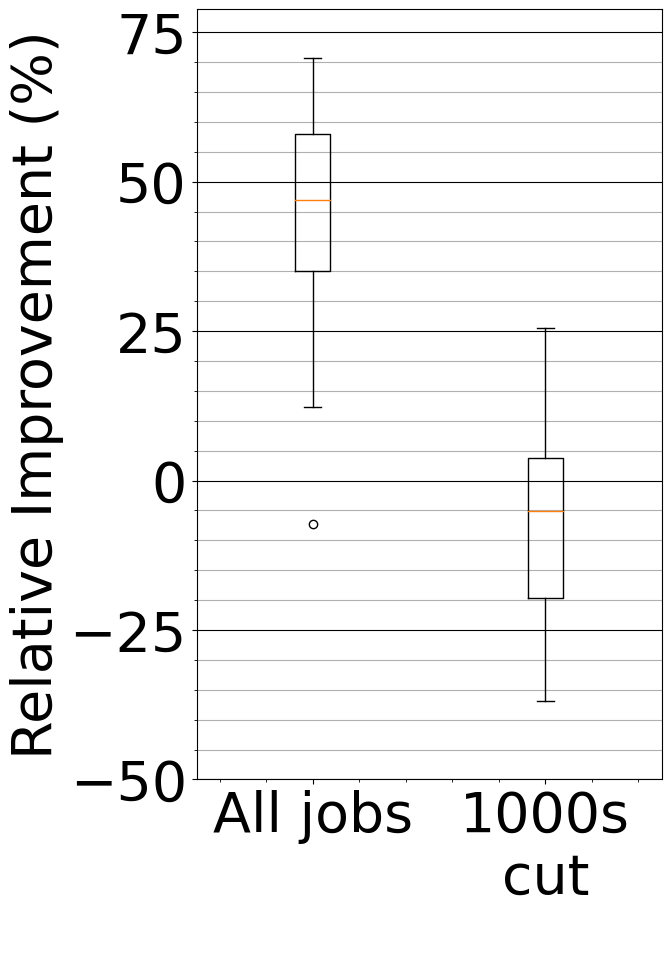

In [7]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
a = parser_from_batsim_results.loss_ratio_boxplot4(loss_list, name_list,
    prefixs = ['', '1e3cut_'],
    prefixs_label = ['All jobs', '1000s\ncut'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw bounded slowdown'],
    keywords_label = ['','']
    )
plt.ylabel('Relative Improvement (%)')
plt.ylim(bottom=-50)

Text(0, 0.5, 'Relative Improvement (%)')

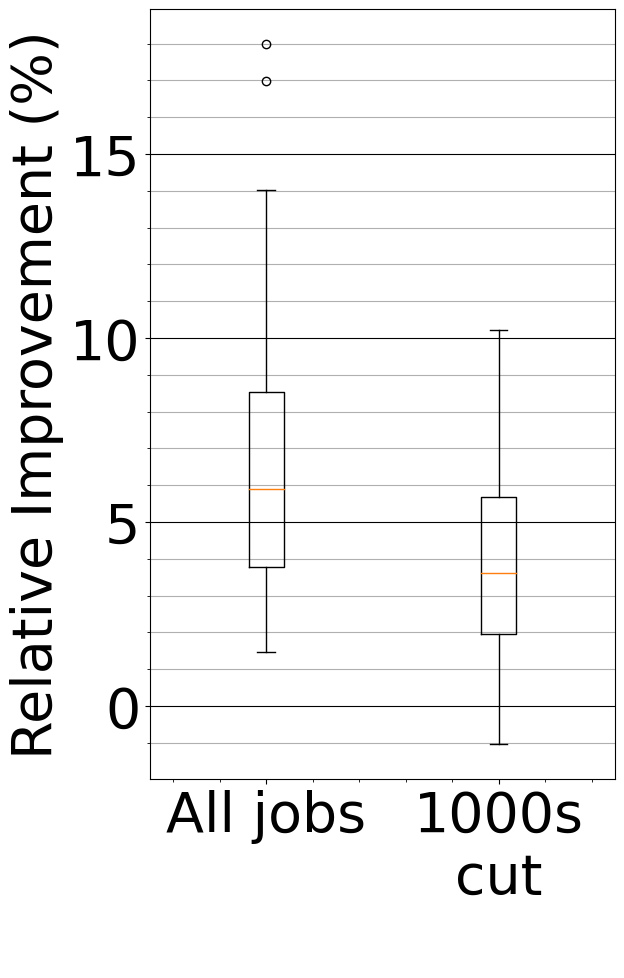

In [8]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
a = parser_from_batsim_results.loss_ratio_boxplot4(loss_list, name_list,
    prefixs = ['', '1e3cut_'],
    prefixs_label = ['All jobs', '1000s\ncut'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['response time (weighted by area)'],
    keywords_label = ['','']
    )
plt.ylabel('Relative Improvement (%)')
# plt.ylim(bottom=-50)

Text(0, 0.5, 'Relative Improvement (%)')

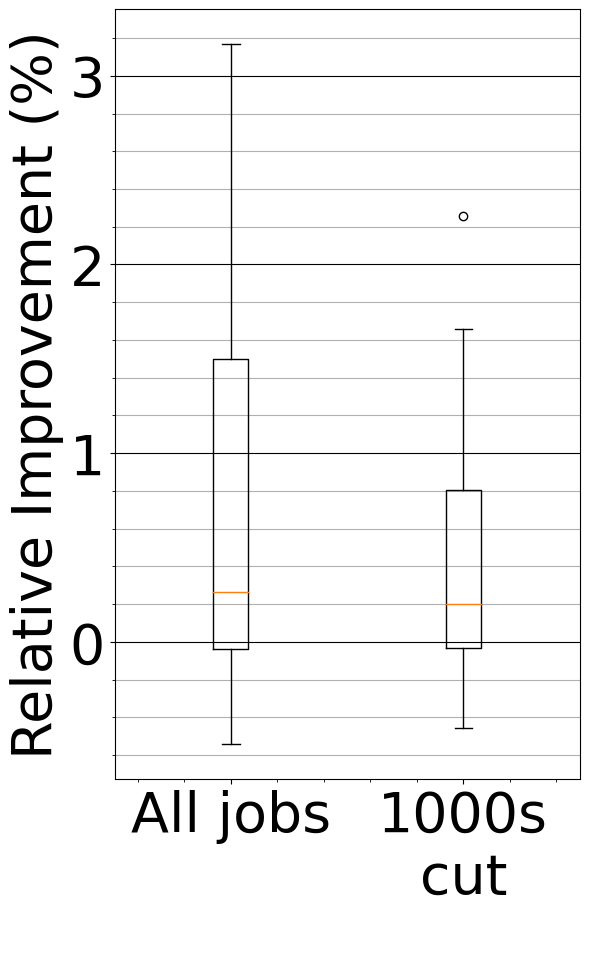

In [9]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
a = parser_from_batsim_results.loss_ratio_boxplot4(loss_list, name_list, maximization_objective= True,
    prefixs = ['', '1e3cut_'],
    prefixs_label = ['All jobs', '1000s\ncut'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw utilization'],
    keywords_label = ['','']
    )
plt.ylabel('Relative Improvement (%)')
# plt.ylim(bottom=-50)

# Mira and Theta boxplot

In [ ]:
# load traces
jlm, nlm = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Mira with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
xm, name_listm =  extract_name_and_param(nlm)
#compute metrics
loss_listm = parser_from_batsim_results.make_loss_list(jlm)

In [ ]:
# load traces
jlt, nlt = parser_from_batsim_results.make_jobs_list('Rt vs Wt on Theta with Batsched')
# extract information of different traces
def extract_name_and_param(name_list):
    xx = [ e.split('_') for e in name_list]
    xx = [ ('_'.join(x[:-1]), x[-1]) for x in xx]
    names = np.array([ e[0] for e in xx])
    x = np.array([ float(e[1]) for e in xx])
    return x, names
xt, name_listt =  extract_name_and_param(nlt)
#compute metrics
loss_listt = parser_from_batsim_results.make_loss_list(jlt, total_number_of_nodes = 4392)

Text(0, 0.5, 'Relative Improvement (%)')

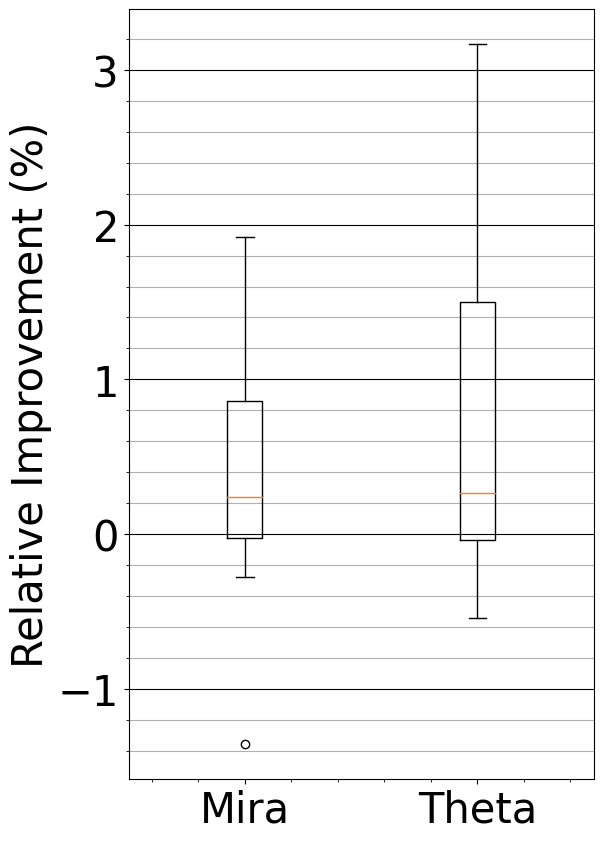

In [30]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')

parser_from_batsim_results.loss_ratio_boxplot2([loss_listm, loss_listt], [name_listm, name_listt],
    loss_list_names = ['Mira', 'Theta'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw utilization'],
    keywords_names = ['Utilization'],
)
plt.ylabel('Relative Improvement (%)')

Text(0, 0.5, 'Relative Improvement (%)')

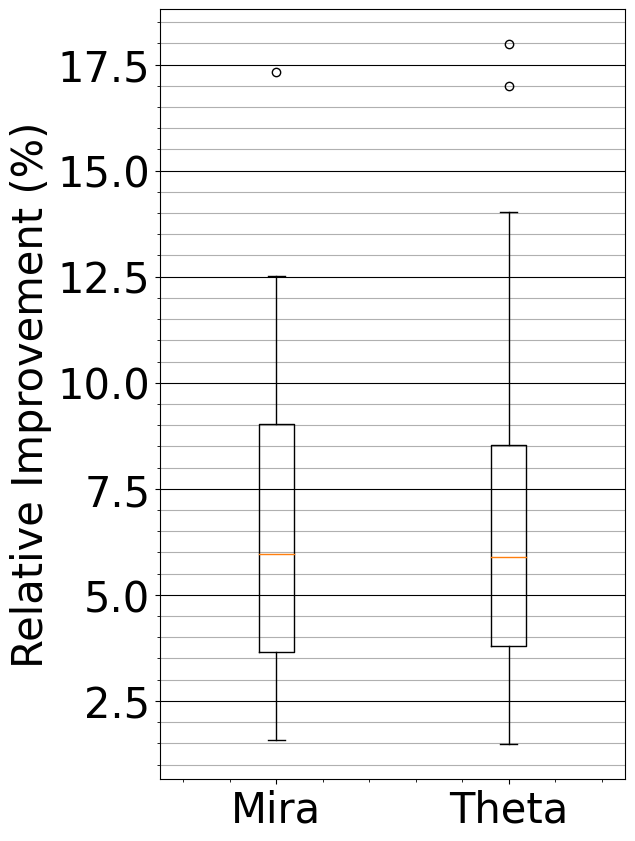

In [35]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
parser_from_batsim_results.loss_ratio_boxplot3([loss_listm, loss_listt], [name_listm, name_listt],
    loss_list_names = ['Mira', 'Theta'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['response time (weighted by area)'],
    keywords_names = ['response time (weighted by area)'],
)
plt.ylabel('Relative Improvement (%)')

Text(0, 0.5, 'Relative Improvement (%)')

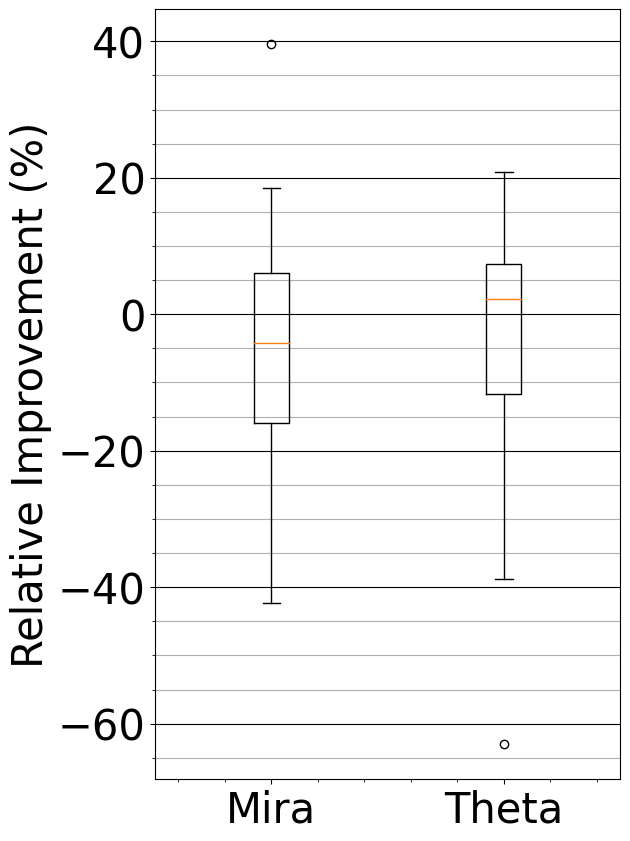

In [36]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
parser_from_batsim_results.loss_ratio_boxplot3([loss_listm, loss_listt], [name_listm, name_listt],
    loss_list_names = ['Mira', 'Theta'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw response time'],
    keywords_names = ['raw response time'],
)
plt.ylabel('Relative Improvement (%)')

Text(0, 0.5, 'Relative Improvement (%)')

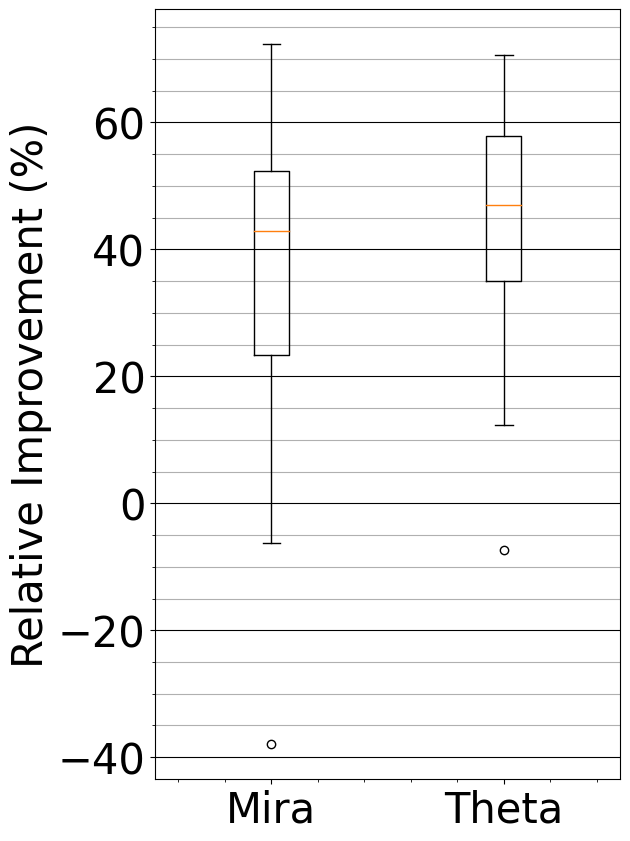

In [37]:
plt.figure(figsize=(6,10))
plt.grid(which='major', axis='y', c='k')
plt.minorticks_on()
plt.grid(which='minor', axis ='y')
parser_from_batsim_results.loss_ratio_boxplot3([loss_listm, loss_listt], [name_listm, name_listt],
    loss_list_names = ['Mira', 'Theta'],
    names = ['adjusted_walltime','runtime'],
    keywords = ['raw bounded slowdown'],
    keywords_names = ['raw bounded slowdown'],
)
plt.ylabel('Relative Improvement (%)')